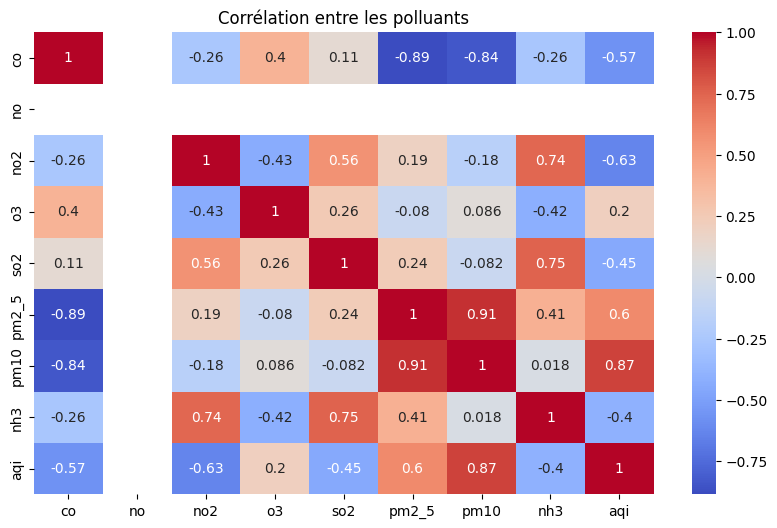

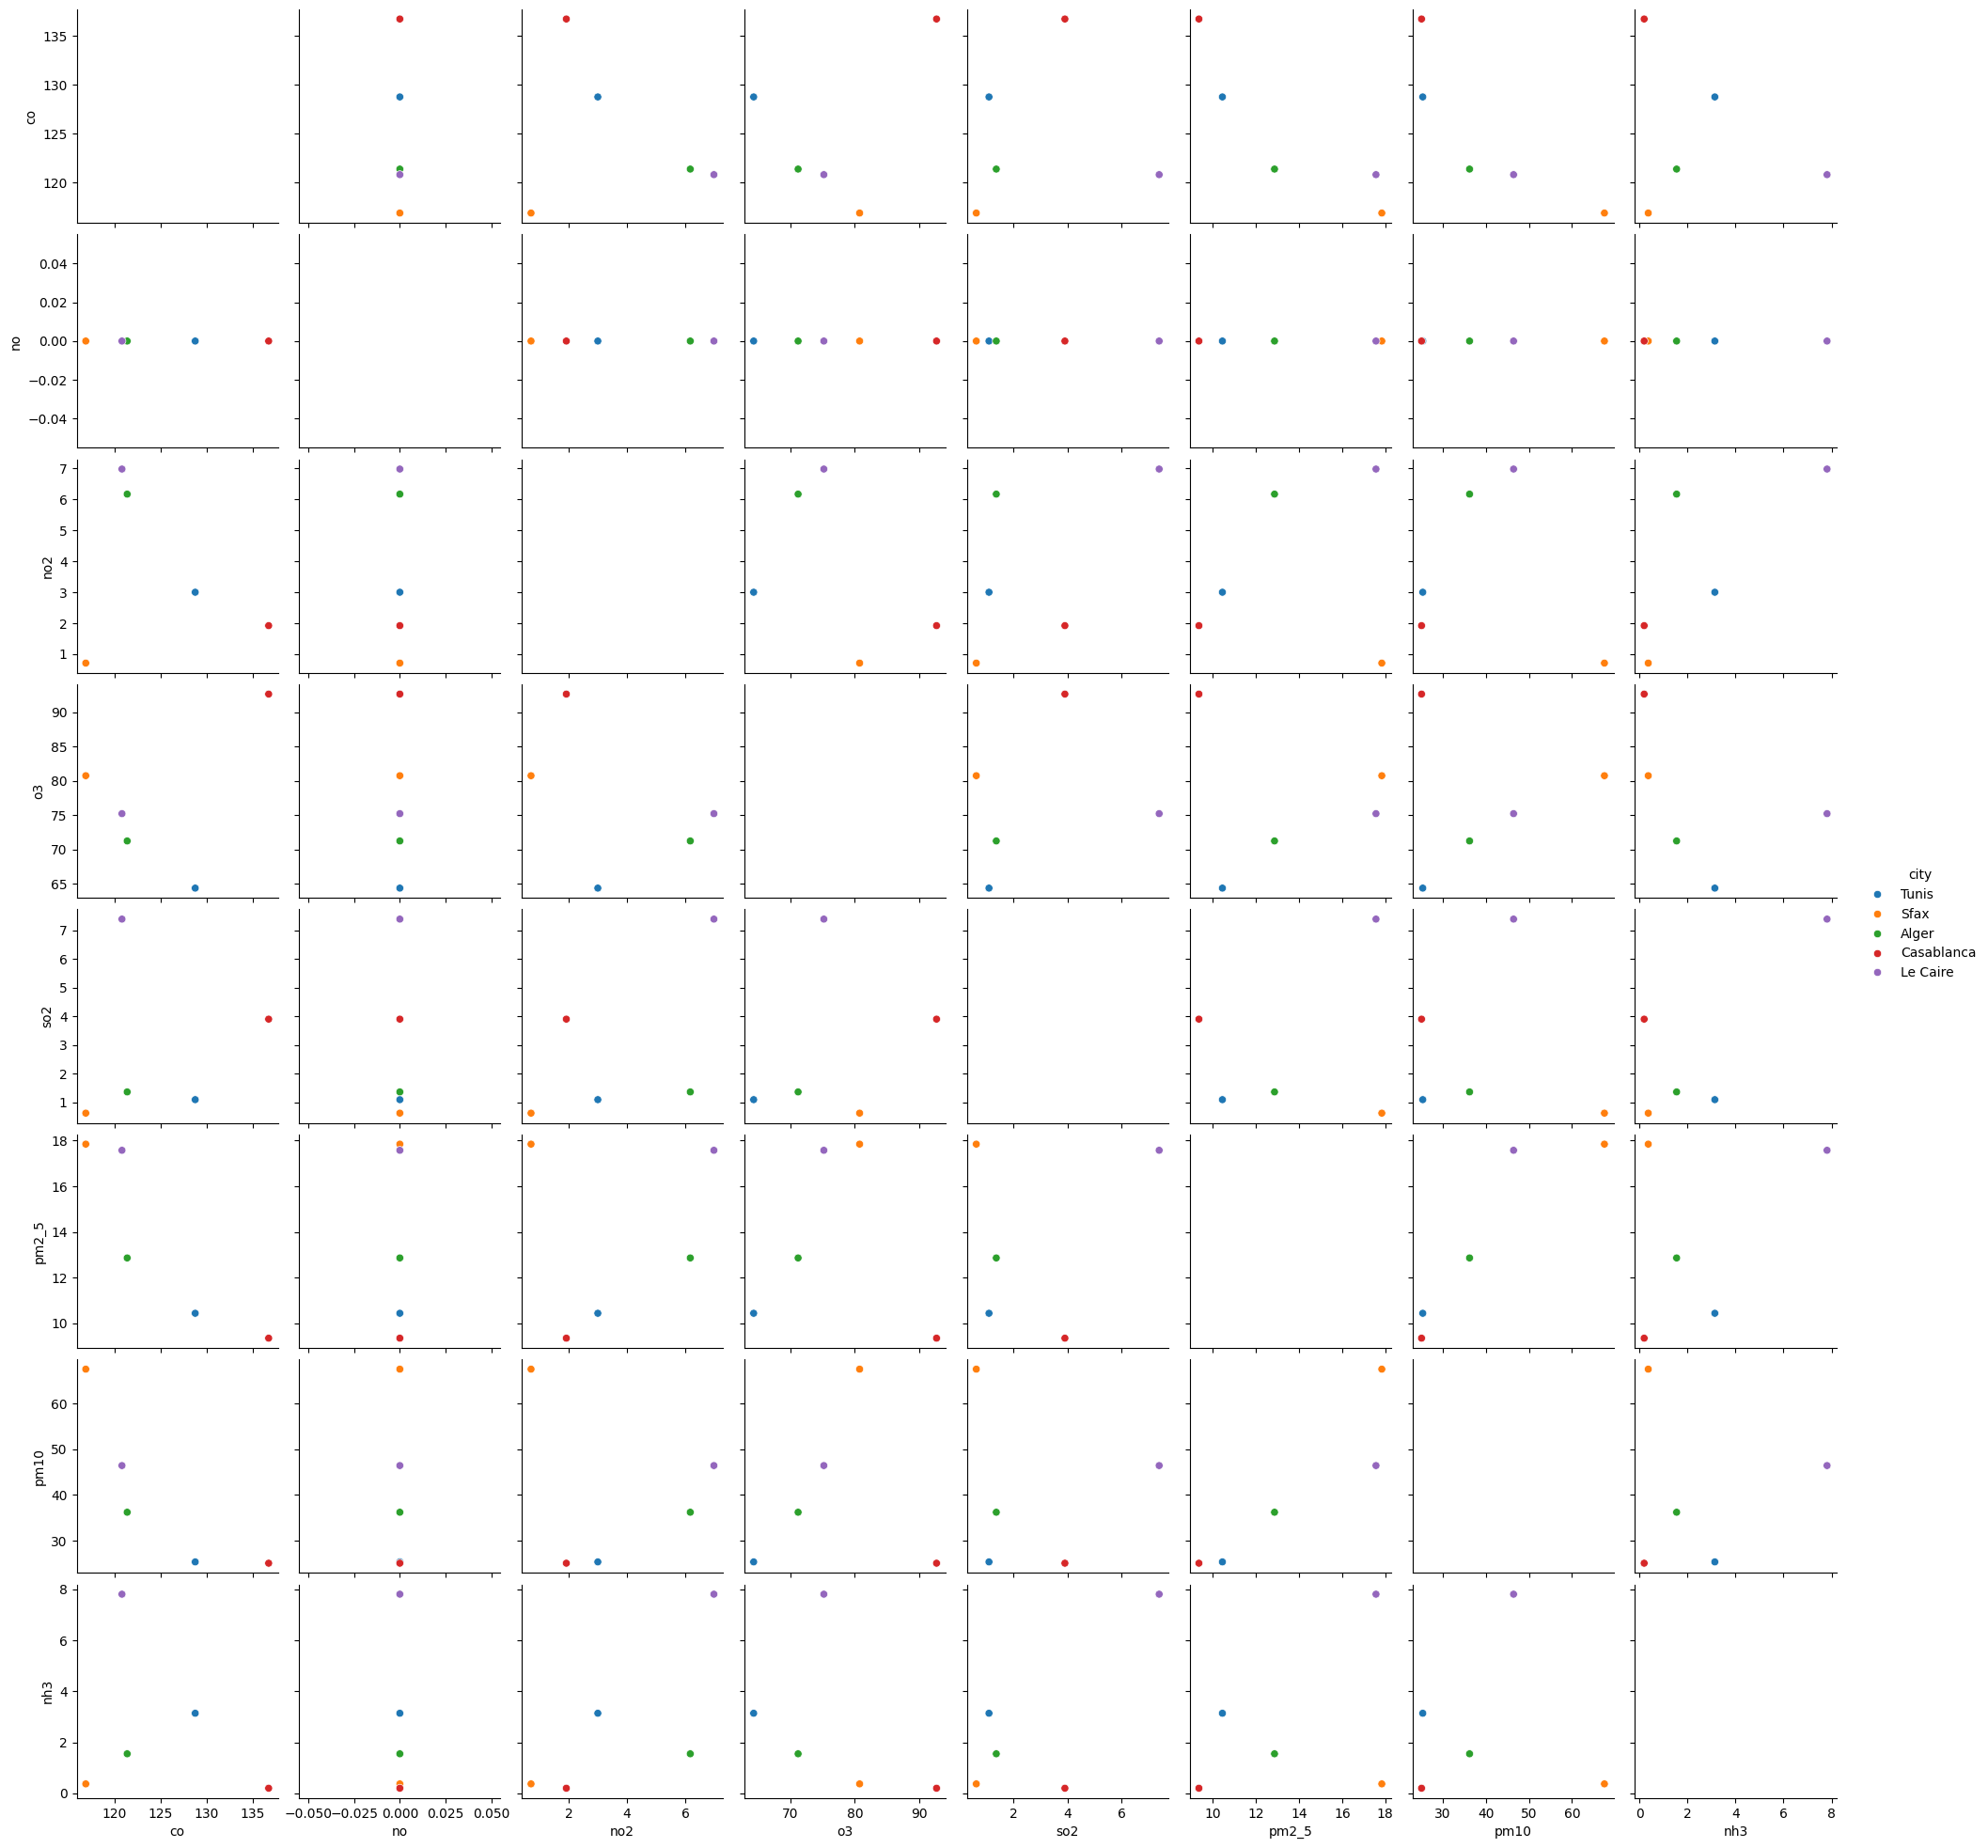

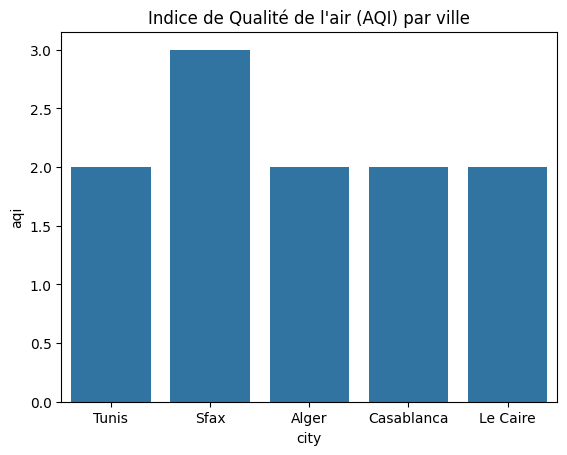

In [1]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dotenv import load_dotenv

# Charger la clé API
load_dotenv()
API_KEY = os.getenv("OPENWEATHER_API_KEY")

def get_air_quality(city, api_key):
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={api_key}"
    geo_response = requests.get(geocode_url)
    if geo_response.status_code != 200:
        print("Erreur lors de la géolocalisation")
        return None

    location = geo_response.json()[0]
    lat, lon = location['lat'], location['lon']

    air_url = f"http://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={lon}&appid={api_key}"
    air_response = requests.get(air_url)
    if air_response.status_code != 200:
        print("Erreur lors de la récupération des données de qualité de l'air")
        return None

    data = air_response.json()['list'][0]
    df = pd.DataFrame([data['components']])
    df['aqi'] = data['main']['aqi']
    df['city'] = city
    return df

# Liste des villes à comparer
cities = ["Tunis", "Sfax", "Alger", "Casablanca", "Le Caire"]

df_all = pd.concat([get_air_quality(city, API_KEY) for city in cities], ignore_index=True)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_all.drop(columns=['city']).corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les polluants")
plt.show()

# Pairplot
sns.pairplot(df_all.drop(columns='aqi'), hue="city")
plt.show()

# Bar plot AQI par ville
sns.barplot(x="city", y="aqi", data=df_all)
plt.title("Indice de Qualité de l'air (AQI) par ville")
plt.show()

# Pie chart moyenne des polluants par ville
melted = df_all.melt(id_vars=["city", "aqi"], var_name="polluant", value_name="valeur")
fig = px.pie(melted, names="polluant", values="valeur", title="Répartition des polluants (moyenne cumulée)")
fig.show()





